In [25]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.datasets import imdb
#import wandb
#from wandb.keras import WandbCallback
import imdb
import numpy as np
from tensorflow.keras.preprocessing import text
!pip install -q tf-nightly-2.0-preview
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [26]:
import json

In [27]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.0.0-dev20190818


In [5]:
with open('Electronics_5.json') as f:
    data = [json.loads(line) for line in f]

In [4]:
!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
data[0]

{'reviewerID': 'AO94DHGC771SJ',
 'asin': '0528881469',
 'reviewerName': 'amazdnu',
 'helpful': [0, 0],
 'reviewText': 'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!',
 'overall': 5.0,
 'summary': 'Gotta have GPS!',
 'unixReviewTime': 13701

In [33]:
len(data)

1689188

In [60]:
list1=[]
for i in range(1,len(data)):
    j=data[i]['reviewText']
    list1.append(j)

In [61]:
list2=[]
for i in range(1,len(data)):
    j=data[i]['overall']
    list1.append(j)

In [62]:
X_train=list1[18000:19000]
X_test=list1[18520:19020]

In [63]:
list2=[]
for i in range(0,len(data)):
    if data[i]['overall']>=4:
        j=1
    else:
        j=0
    list2.append(j)

In [64]:
type(list1[2])

str

In [65]:
y_train=list2[18000:19000]
y_test=list2[18520:19020]

In [66]:
# set parameters:
vocab_size = 1000
maxlength = 10000
batch_size = 30
embedding_dims = 20
filters = 50
kernel_size = 3
hidden_dims = 150
epochs = 3

In [67]:
tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_matrix(X_train)
X_test = tokenizer.texts_to_matrix(X_test)

In [68]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlength)
X_test = sequence.pad_sequences(X_test, maxlen=maxlength)

In [69]:
type(y_train)

list

In [16]:
#tf.compat.v1.get_default_graph

<function tensorflow.python.framework.ops.get_default_graph()>

In [18]:
#from keras import backend

In [23]:
#from tensorflow.keras import backend
#from tensorflow.python.keras import backend as K

In [70]:
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dims,
                    input_length=maxlength))

In [71]:
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu'))

In [72]:
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu'))

In [73]:
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [74]:
from keras.optimizers import SGD

In [75]:
#opt = SGD(lr=0.1)

In [76]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [77]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [79]:
from tensorflow.python.keras.engine import data_adapter

In [85]:
history=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(X_test, y_test))

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [55]:
import matplotlib.pyplot as plt

In [56]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


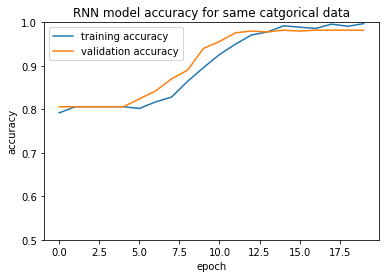

In [148]:
#plt.xlim([0.2,0.9])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
axes=plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([.5,1])
plt.title('RNN model accuracy for same catgorical data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

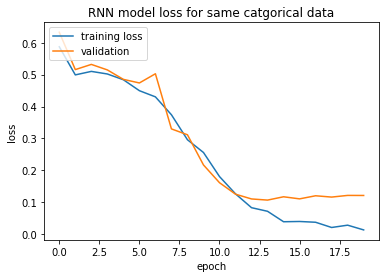

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#axes=plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([.5,1])
plt.title('RNN model loss for same catgorical data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation'], loc='upper left')
plt.show()

(0.5, 1)

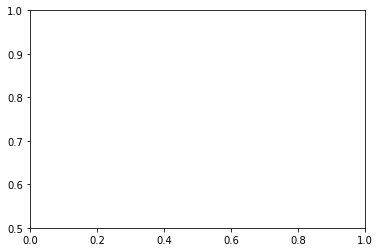

In [36]:
axes=plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([.5,1])

In [40]:
predict= model.predict(X_test)

In [71]:
list1[1000026]

"A 4.5 star rating for these phones is a crime; it had me expecting more and I was disappointed.  Ultimately, these aren't bad for $6.19, but the Panasonic RPHJE120P's are better at the same price.The iLuv &#34;ultra bass&#34; sounds good but not exactly natural; nowhere near as clean as a cheap pair of over-ear phones.The body of these iLuvs are huge, and you can feel them in your ears the entire time you're wearing them.  If you're lucky, you won't get a headache!I also own the Panasonic RPHJE120G's, which are my everyday phones.  They sound clean and natural, and fit perfectly.  They're light and comfortable enough to wear all day long."

In [72]:
predict[26]

array([0.79209447], dtype=float32)

In [60]:
y_test[3]

1

In [30]:
#number of negative
j=0
for i in y_test:
    if i<1:
        j=j+1
print(j)

13714


In [31]:
#number of negative
j=0
for i in predict:
    if i<0.7832:
        j=j+1
print(j)

19557


In [65]:
data[100004]

{'reviewerID': 'A1DV7ZGBNFX0Q3',
 'asin': 'B000243DOE',
 'reviewerName': 'Zelda',
 'helpful': [1, 1],
 'reviewText': "The price and some positive reviews led me to purchase this item, but after only about 1,000 pictures, all I got was corrupted data.  I had the card professionally tested to ensure it was the card and nothing wrong with my camera.  It definitely showed the card was the problem.  Luckily, I had recently done a download.  Won't trust my pictures to this brand again!",
 'overall': 1.0,
 'summary': 'Stopped working after 1,500 pictures!!!!',
 'unixReviewTime': 1172534400,
 'reviewTime': '02 27, 2007'}